<h1 align="center"><b>AI Lab: Computer Vision and NLP</b></h1>
<h3 align="center">Lessons 15: Machine Learning and the Naive Bayes Classification</h3>

---

The Bayesian classification methods rely on the probabilistic theorem of Bayes, which states the following:

$$ \mathbb{P}(L \; | \; \text{features}) \; = \; \frac{\mathbb{P}(\text{features} \; | \; L) \cdot \mathbb{P}(L)}{\mathbb{P}(\text{features})} $$

In order to use such theorem, we need the probability of all the features.

We have two types of Bayesian Classification methods: the **Gaussian Naive Bayes** method and the **Multinomial Naive Bayes**. Such methods can be used to classify text as well. In this case, we'll use the Multinomial Naive Bayes method. In order to do so, we must first import the following packages:

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

First things first, we need to issue the elephant in the room: `sklearn`, by default, cannot run on anywhere else than on the CPU. We might want thus, for academic purpouses, to reduce the number of categories analyzed by the model to 3 or 4. Let's select the following categories:

In [3]:
categories = [
    "talk.religion.misc",
    "sci.space",
    "comp.graphics"
]

Let's now load the dataset:

In [4]:
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="test", categories=categories)

Now that we loaded all the necessary data, we can now prepare the model and the pipeline for doing the training. The `make_pipeline()` function is useful because it allows to make a list of operations which will be executed in order, without the need of creating extra variables:

In [5]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Let's now train the model:

In [6]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

We can also test the model now, after it got trained:

In [7]:
labels = model.predict(test.data)

And finally we can plot the confusion matrix:

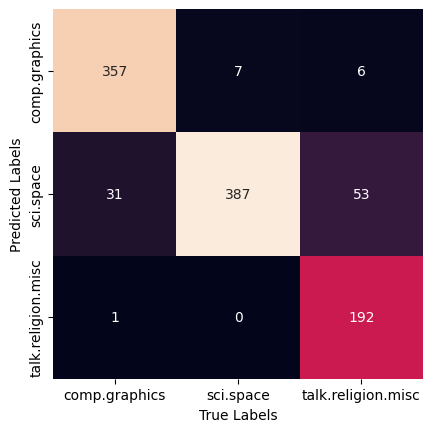

In [8]:
conf_matrix = confusion_matrix(test.target, labels)
sns.heatmap(
    conf_matrix.T,
    fmt="d",
    square=True,
    annot=True,
    cbar=False,
    xticklabels=train.target_names,
    yticklabels=train.target_names
    )

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()

We can also provide our own sentence and see how it gets classified:

In [27]:
strings = [
    "We don't need the light",
    "This computer is so fast that it looks like a rocket",
    "I believe in what I see",
    "On God!",
    "I've been married a long time ago. Where do you come from, where do you go? Where do you come from cotton eye Joe?",
    "I don't want to set the world on fire. I just want to stall a flame in your heart"
    ]

for string in strings:
    pred = model.predict([string])

    print(f'"{string if len(string) <= 40 else string[:40] + "..."}" got classified in {train.target_names[pred[0]]}')

"We don't need the light" got classified in sci.space
"This computer is so fast that it looks l..." got classified in comp.graphics
"I believe in what I see" got classified in sci.space
"On God!" got classified in talk.religion.misc
"I've been married a long time ago. Where..." got classified in sci.space
"I don't want to set the world on fire. I..." got classified in sci.space
